In [1]:
import projection
import numpy as np
import plot
import utils
import importlib
import os
import read_chroma
import numpy as np
import math
import baseline_correction
import discriminant_pixel
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
import matching
import mass_spec
from sklearn.preprocessing import normalize
import find_biom


In [2]:
labels = ['positif faible', 'positif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'positif faible', 'positif faible', 'negatif']
labels = np.array(labels)

In [3]:
FOLD_PATH = 'F:/Bureau/032023-data-Tenax-VOC-COVID/'
mod_time = 1.25
files = os.listdir(FOLD_PATH)[:10]
files

['801850-A-C-01-157-split10.cdf',
 '801850-A-C-01-157-split10.txt',
 '802111-P-M-01-158-split10.cdf',
 '802111-P-M-01-158-split10.txt',
 '802115-A-Y-01-152-split10.cdf',
 '802115-A-Y-01-152-split10.txt',
 '802116-S-S-01-154-split10.cdf',
 '802116-S-S-01-154-split10.txt',
 '802118-P-W-01-149-split10.cdf',
 '802118-P-W-01-149-split10.txt']

In [4]:
FOLD_PATH + files[2]

'F:/Bureau/032023-data-Tenax-VOC-COVID/802111-P-M-01-158-split10.cdf'

In [5]:
CORRECTED_CHROMA_PATH = 'C:/Users/Stan/pic/COVID/alignement/corrected_chromatos/aligned_positif_ref/'
corrected_chroma_files = os.listdir(CORRECTED_CHROMA_PATH)
corrected_chroma_files

['801850-A-C-01-157-split10.txt',
 '802111-P-M-01-158-split10.txt',
 '802115-A-Y-01-152-split10.txt',
 '802116-S-S-01-154-split10.txt',
 '802118-P-W-01-149-split10.txt',
 '817811-B-F-01-156-split10.txt',
 '817815-A-A-01-151-split10.txt',
 '817824-C-A-01-150-split10.txt',
 '817837-C-H-01-155-split10.txt',
 '817840-D-I-01-153-split10.txt']

# Disc pixels

In [6]:
chromato_ref_obj = read_chroma.read_chroma(FOLD_PATH + files[2], mod_time)

In [7]:
chromato, time_rn, spectra_obj = chromato_ref_obj

In [8]:
chromato, time_rn, spectra_obj = chromato_ref_obj
full_spectra = mass_spec.read_full_spectra_centroid(spectra_obj=spectra_obj)
spectra, debuts, fins = full_spectra

--- 312.8088915348053 seconds --- to compute full spectra centroid


In [9]:
chromato_cube = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra, spectra_obj=spectra_obj)

In [10]:
chromato_cube = np.array(baseline_correction.chromato_cube_corrected_baseline(chromato_cube))

In [11]:
importlib.reload(discriminant_pixel)

<module 'discriminant_pixel' from 'c:\\Users\\Stan\\pic\\discriminant_pixel.py'>

In [12]:
chromato_no_bl = baseline_correction.chromato_no_baseline(chromato)

In [13]:
aligned_chromatos = discriminant_pixel.read_aligned_chromatos(CORRECTED_CHROMA_PATH)
aligned_chromatos = np.array([baseline_correction.chromato_no_baseline(aligned_chromato) for aligned_chromato in aligned_chromatos])

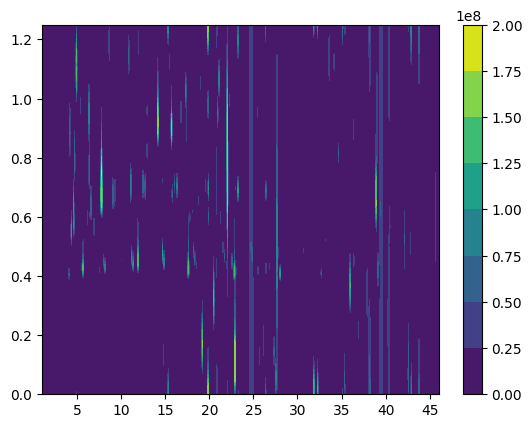

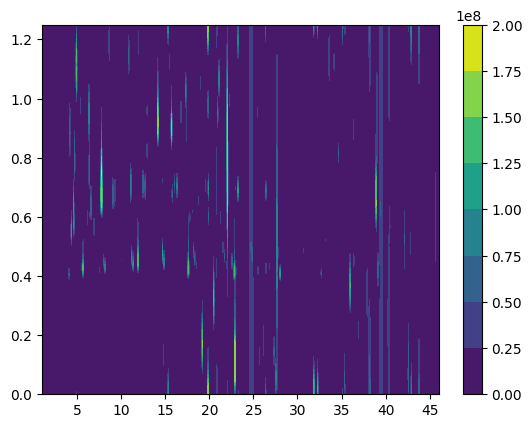

In [14]:
plot.visualizer((chromato_no_bl, time_rn), log_chromato=False)
plot.visualizer((aligned_chromatos[1], time_rn), log_chromato=False)

In [15]:
aligned_chromatos.shape

(10, 2160, 250)

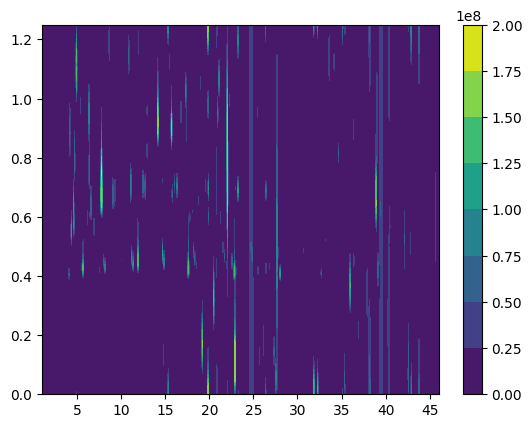

In [16]:
plot.visualizer((chromato_no_bl, time_rn), log_chromato=False)

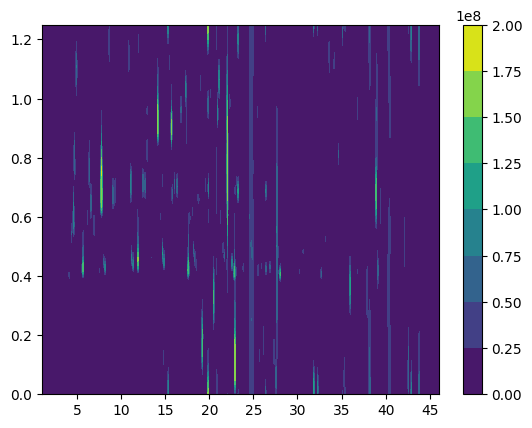

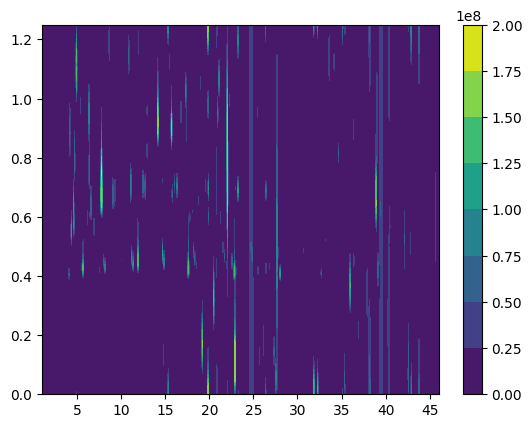

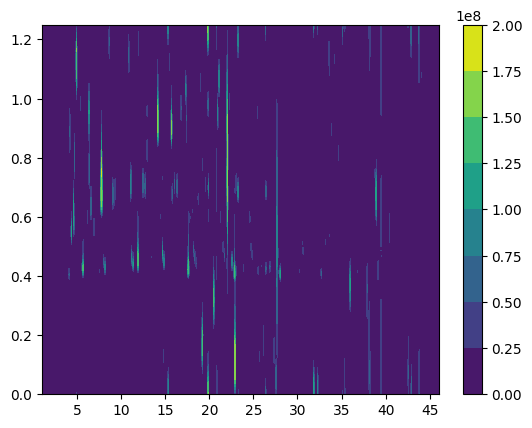

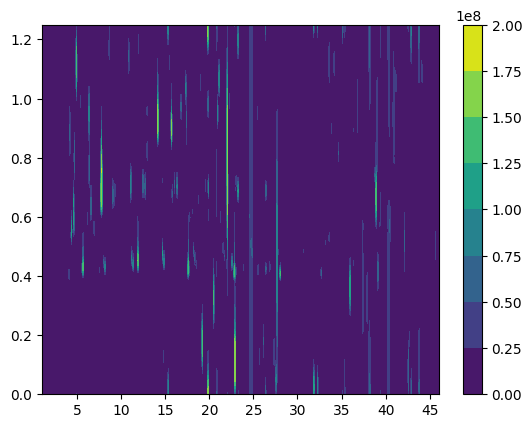

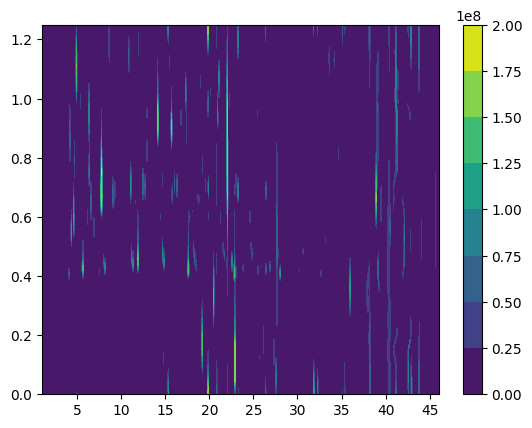

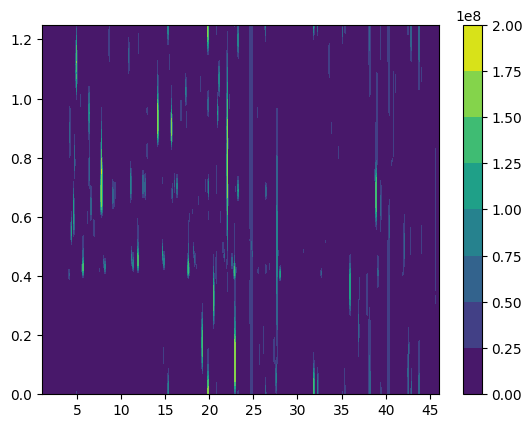

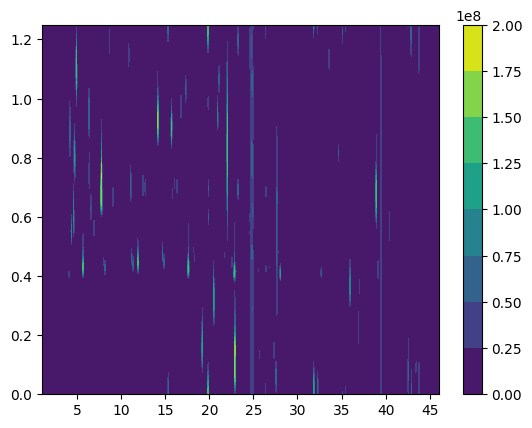

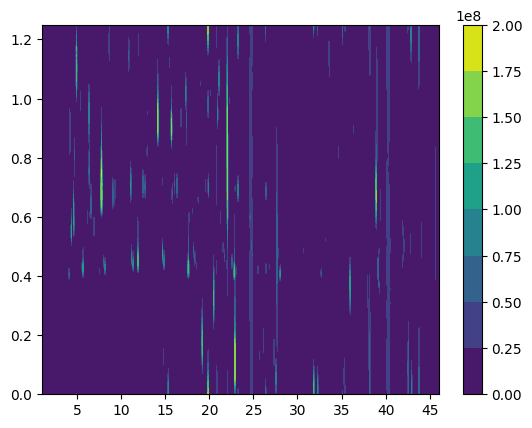

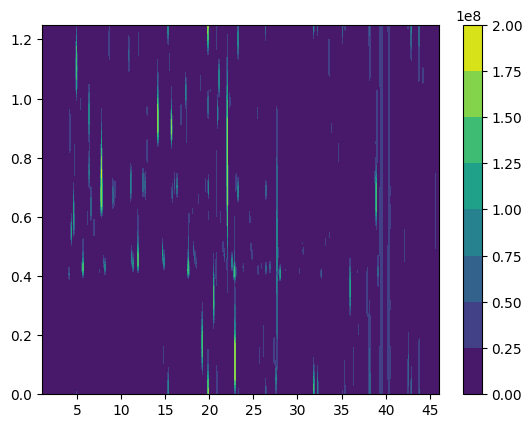

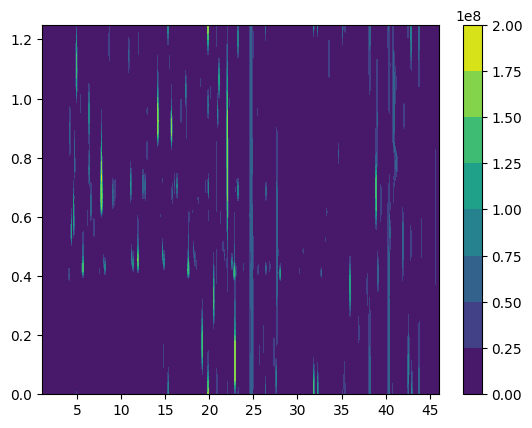

c:\Users\Stan\pic\plot.py:353: RuntimeWarning: divide by zero encountered in log
  chromato = np.log(chromato)


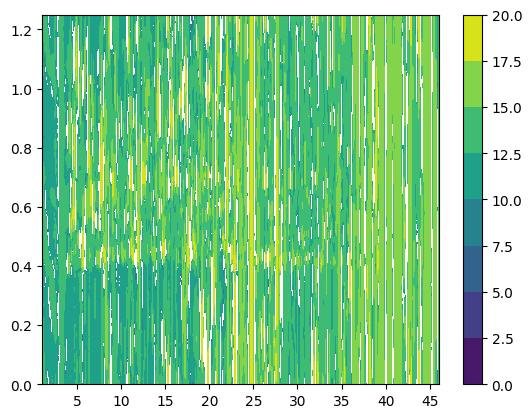

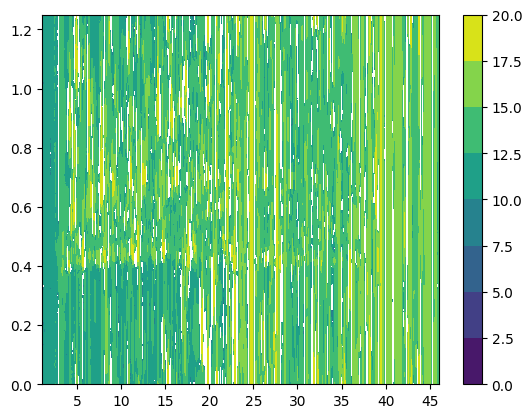

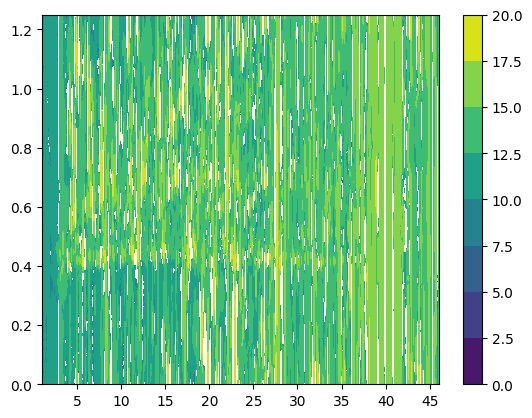

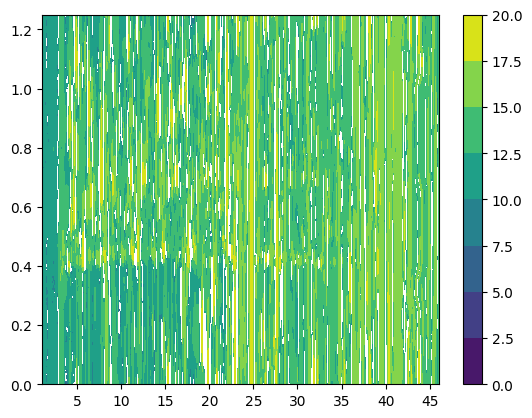

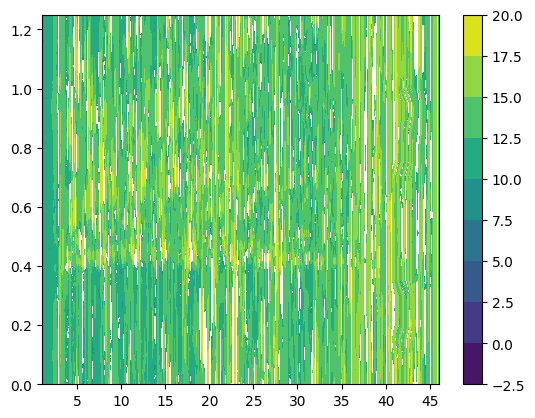

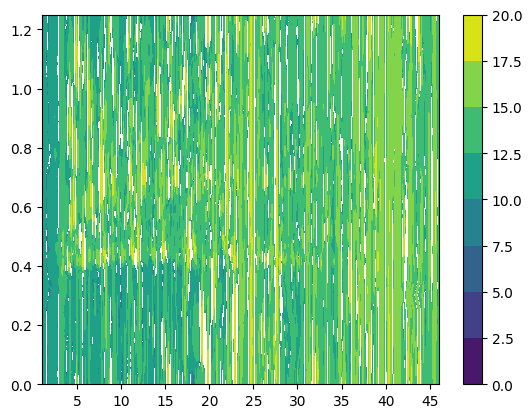

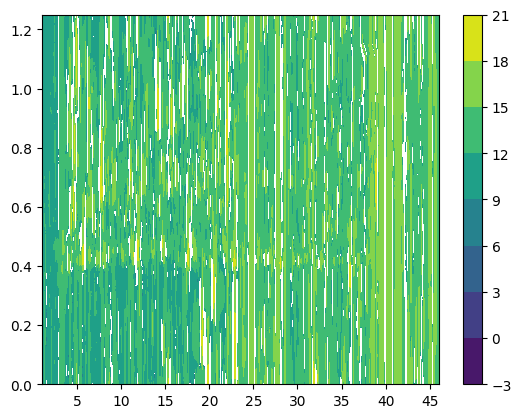

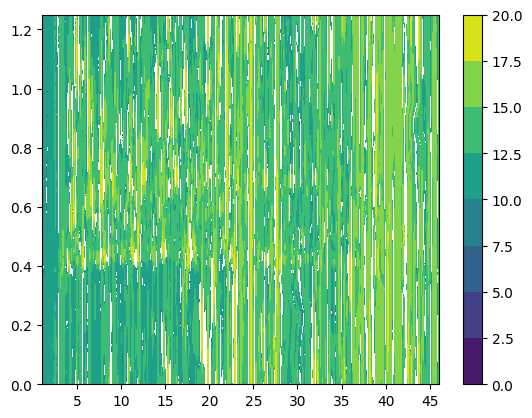

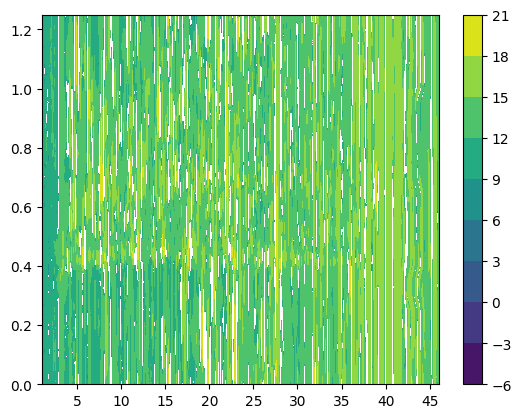

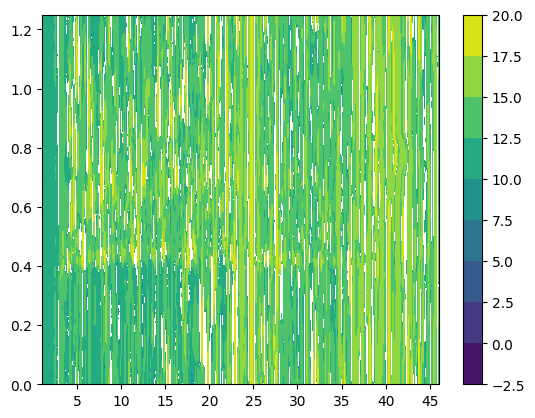

In [17]:
for c in aligned_chromatos:
    plot.visualizer((c, time_rn), log_chromato=False)
for c in aligned_chromatos:
    plot.visualizer((c, time_rn))

## Positif vs (Positif Faible vs Neg)

In [15]:
vij_posi_vs_other = np.ones(labels.shape)
vij_posi_vs_other[labels != 'positif'] = -1
vij_posi_vs_other

array([-1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.])

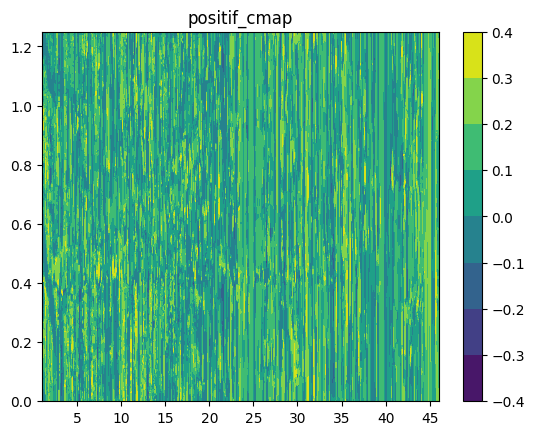

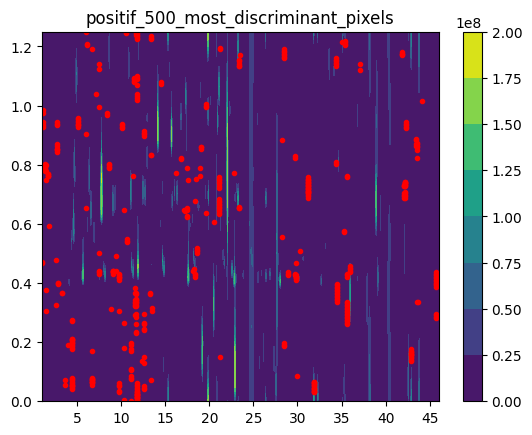

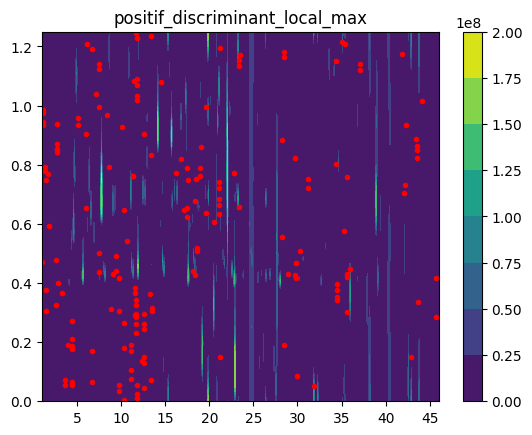

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Phenoxypropylamine, N-t-butyl-2-fluoro-�,3,4-trihydroxy-: [-31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Phenyl-�-D-glucopyranoside: [-31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-D-Glucopyranoside, phenyl: [-31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python3

nb peaks:
173


c:\Users\Stan\pic\matching.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(match)
c:\Users\Stan\pic\plot.py:364: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
c:\Users\Stan\pic\plot.py:364: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


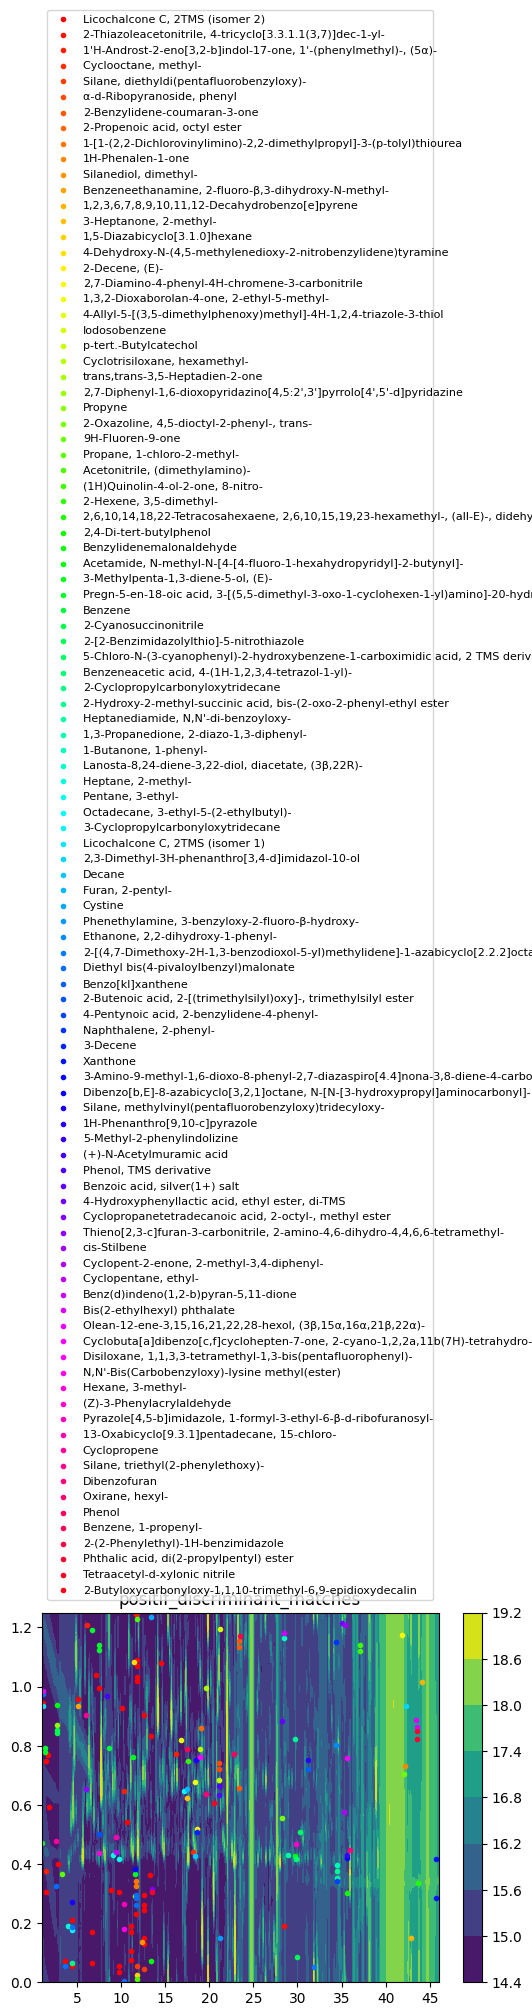

In [16]:
matches = discriminant_pixel.find_discriminant_compounds(chromato_ref_obj, aligned_chromatos, chromato_cube, vij_posi_vs_other, disp=True, max_pixel=500, local_max_filter=True, mod_time=1.25, title="positif_")

In [17]:
for match in matches[:20]:
    print(match[1]["compound_name"])
    print(match[0])
    print(match[1]["hit_prob"])

Licochalcone C, 2TMS (isomer 2)
[11.129679183861787, 0.07530120481927711]
51.29
Licochalcone C, 2TMS (isomer 2)
[7.5238469025760075, 0.9939759036144579]
37.39
2-Thiazoleacetonitrile, 4-tricyclo[3.3.1.1(3,7)]dec-1-yl-
[28.450179910731634, 0.19076305220883535]
5.19
1'H-Androst-2-eno[3,2-b]indol-17-one, 1'-(phenylmethyl)-, (5α)-
[11.734125057603332, 1.2449799196787148]
20.64
Cyclooctane, methyl-
[18.195443018288834, 0.44176706827309237]
2.97
Silane, diethyldi(pentafluorobenzyloxy)-
[11.775810979930336, 0.055220883534136546]
38.18
Licochalcone C, 2TMS (isomer 2)
[10.12921704801371, 0.928714859437751]
54.59
α-d-Ribopyranoside, phenyl
[21.113457581179063, 0.7228915662650602]
8.3
2-Benzylidene-coumaran-3-one
[23.427026270327744, 1.1546184738955823]
25.97
2-Propenoic acid, octyl ester
[19.029161464828903, 0.858433734939759]
4.74
1-[1-(2,2-Dichlorovinylimino)-2,2-dimethylpropyl]-3-(p-tolyl)thiourea
[11.650753212949327, 0.3413654618473896]
14.22
1H-Phenalen-1-one
[42.14400539515219, 0.7329317269

## Positif + Positif Faible vs Neg

In [197]:
importlib.reload(discriminant_pixel)

<module 'discriminant_pixel' from 'c:\\Users\\Stan\\pic\\discriminant_pixel.py'>

In [198]:
vij_posi_vs_other = np.ones(labels.shape)
vij_posi_vs_other[labels == 'negatif'] = -1
vij_posi_vs_other

array([ 1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1.])

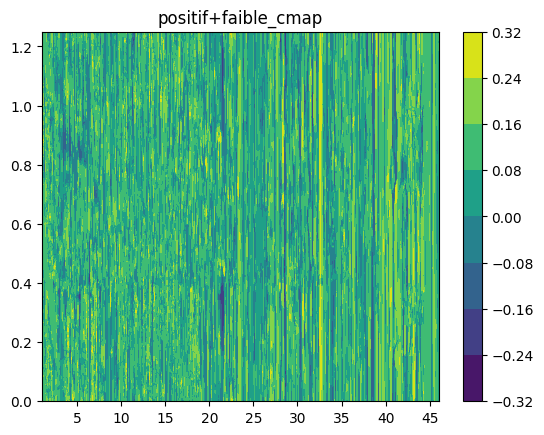

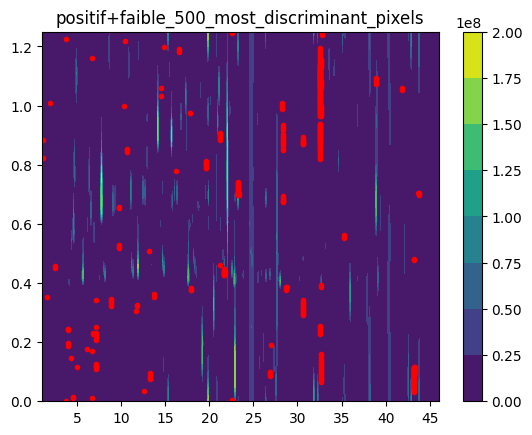

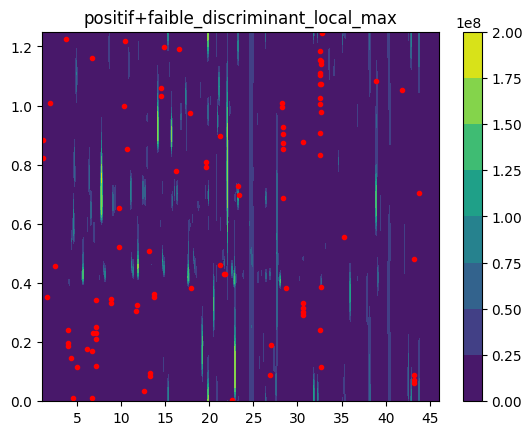

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Ethylacrylonitrile: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Methallyl alcohol: [-31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Methylallyl alcohol: [-31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123

nb peaks:
93


c:\Users\Stan\pic\matching.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(match)
c:\Users\Stan\pic\plot.py:396: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
c:\Users\Stan\pic\plot.py:396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


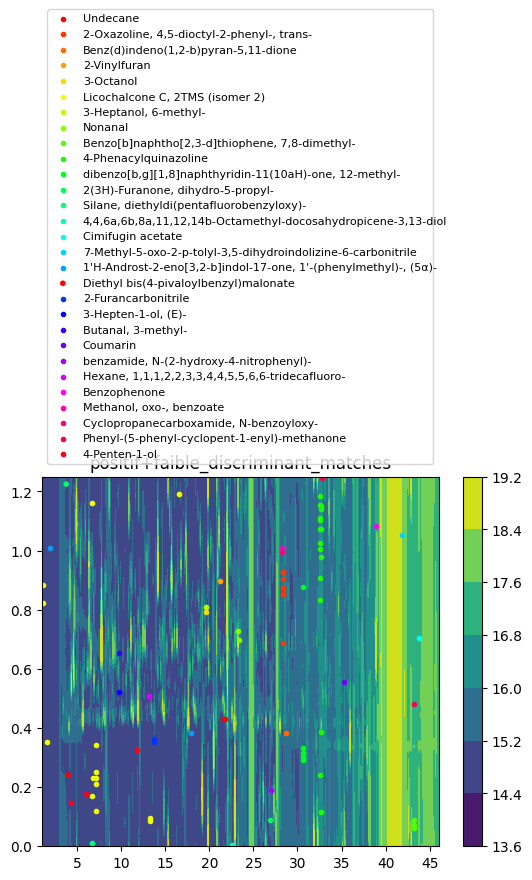

In [199]:
matches_pos_plus_pos_f = discriminant_pixel.find_discriminant_compounds(chromato_ref_obj, aligned_chromatos, chromato_cube, vij_posi_vs_other, disp=True, match_factor_min=500, max_pixel=500, local_max_filter=True, mod_time=1.25, title="positif+faible_")

In [204]:
for match in matches_pos_plus_pos_f[:20]:
    print("\"" + match[1]["compound_name"] + "\",", match[1]["match_factor"], match[0], match[2])


"Undecane", 705 [21.676217532593608, 0.43172690763052207] [992  86]
"2-Oxazoline, 4,5-dioctyl-2-phenyl-, trans-", 571 [28.366808066077628, 0.6877510040160643] [1313  137]
"Benz(d)indeno(1,2-b)pyran-5,11-dione", 567 [28.741981367020657, 0.3815261044176707] [1331   76]
"2-Vinylfuran", 717 [21.238515348160075, 0.8985943775100401] [971 179]
"3-Octanol", 520 [19.654450299733952, 0.7931726907630522] [895 158]
"Licochalcone C, 2TMS (isomer 2)", 554 [1.1250578253810097, 0.8232931726907631] [  6 164]
"3-Heptanol, 6-methyl-", 579 [19.63360733857045, 0.8082329317269076] [894 161]
"Nonanal", 841 [23.301968503346735, 0.7279116465863453] [1070  145]
"Benzo[b]naphtho[2,3-d]thiophene, 7,8-dimethyl-", 548 [43.26952529798128, 0.09036144578313253] [2028   18]
"Benzo[b]naphtho[2,3-d]thiophene, 7,8-dimethyl-", 570 [43.26952529798128, 0.07028112449799197] [2028   14]
"Licochalcone C, 2TMS (isomer 2)", 545 [13.23481826137545, 0.0853413654618474] [587  17]
"Licochalcone C, 2TMS (isomer 2)", 575 [7.19035952395

In [225]:
casnos_dict = (utils.get_name_dict(matches_pos_plus_pos_f))

In [226]:
casnos_dict['Nonanal']

[[23.301968503346735, 0.7279116465863453],
 [23.322811464510238, 0.6977911646586346]]

## Plots peaks

In [185]:
vij_posi_vs_other = np.ones(labels.shape)
vij_posi_vs_other[labels == 'negatif'] = -1
vij_posi_vs_other

array([ 1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1.])

In [227]:
discriminant_pixels_pos_plus_pos_f  = discriminant_pixel.find_discriminant_pixels(chromato_ref_obj, aligned_chromatos, vij_posi_vs_other, disp=False, max_pixel=500, local_max_filter=True)

In [228]:
pix = discriminant_pixels_pos_plus_pos_f[:]
local_discriminant_pixels_in_chromato = projection.matrix_to_chromato(pix, chromato_ref_obj[1], 1.25, chromato.shape)


In [229]:
cmap = discriminant_pixel.compute_map(aligned_chromatos, vij_posi_vs_other)

[1313  137]
1303 127


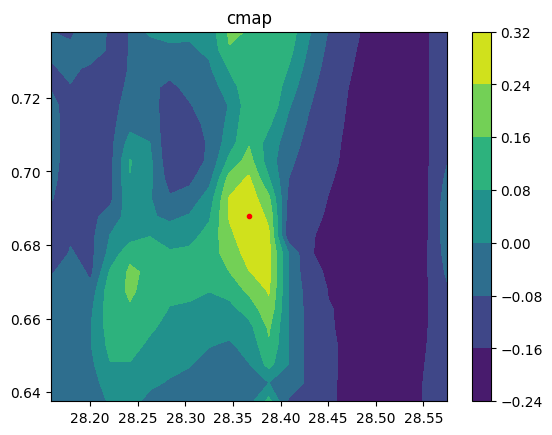

1303 127


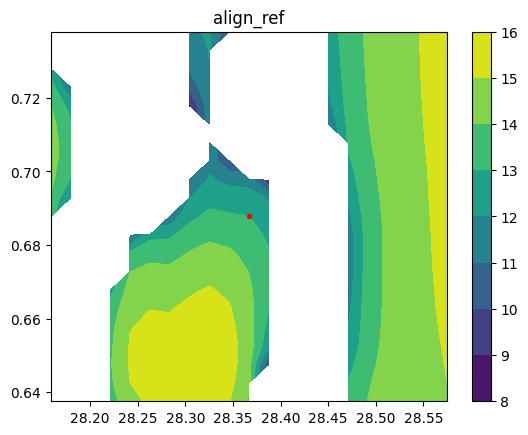

1303 127


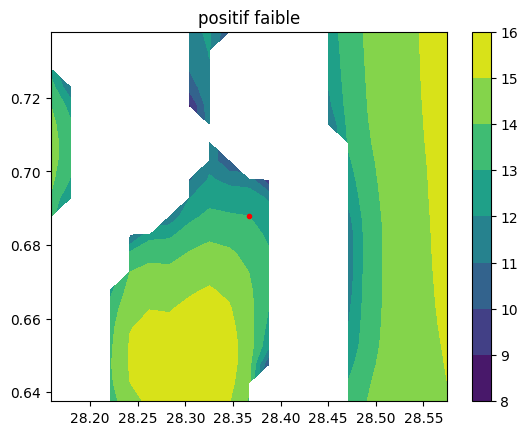

1303 127


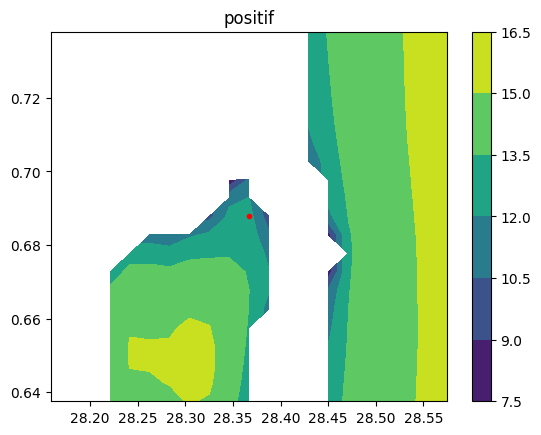

1303 127


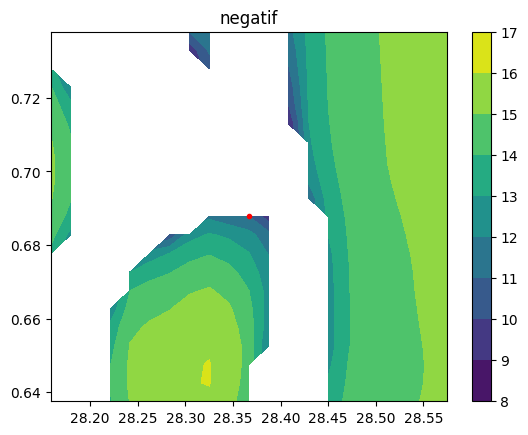

1303 127


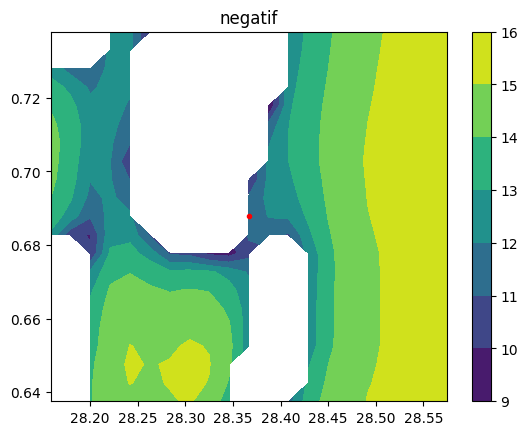

1303 127


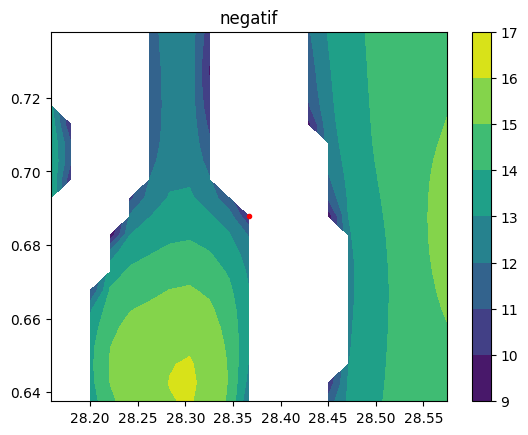

1303 127


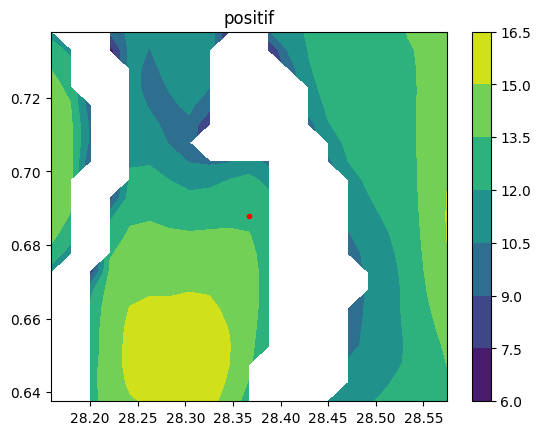

1303 127


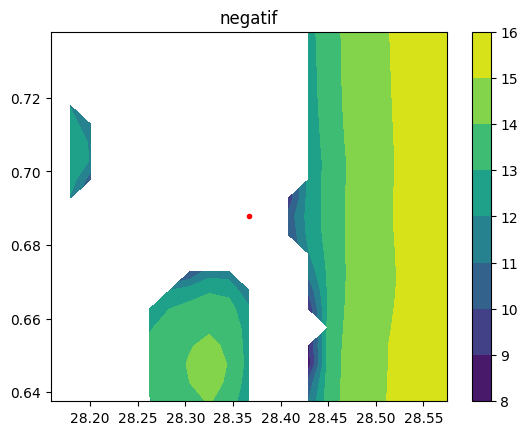

1303 127


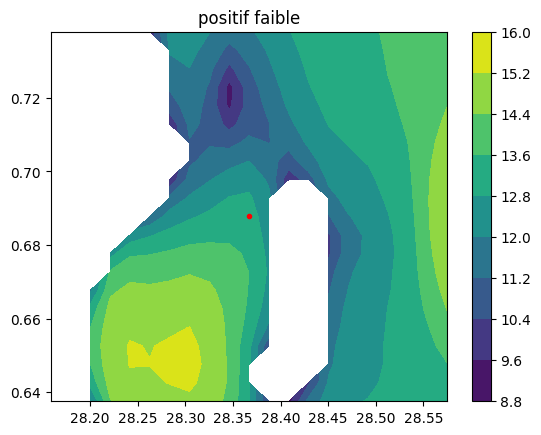

1303 127


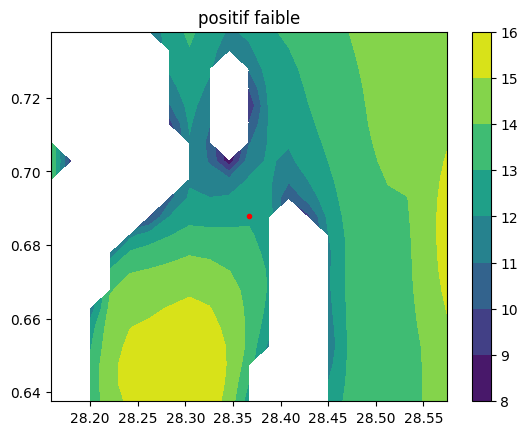

1303 127


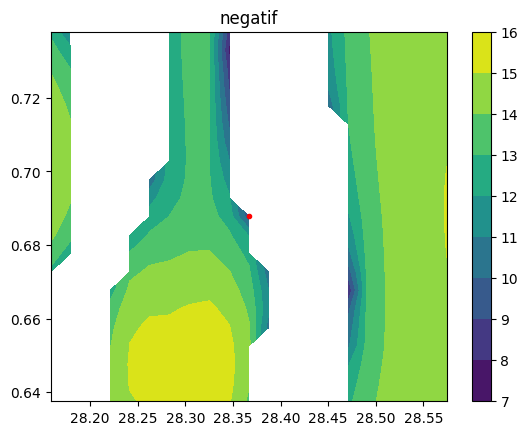

In [234]:
id=1
pt=pix[id]
points = np.array([local_discriminant_pixels_in_chromato[id]])
points=local_discriminant_pixels_in_chromato
print(pt)
plot.visualizer((cmap, chromato_ref_obj[1]), log_chromato=False, points=points, center_pt=pt, center_pt_window_1=10, center_pt_window_2=10, title="cmap")
plot.visualizer((aligned_chromatos[0], chromato_ref_obj[1]), log_chromato=True, points=points, center_pt=pt, center_pt_window_1=10, center_pt_window_2=10, title="align_ref")
for i, c in enumerate(aligned_chromatos):
    plot.visualizer((c, time_rn), log_chromato=True, points=points, center_pt=pt, center_pt_window_1=10, center_pt_window_2=10, title=labels[i])

### Peak detection

In [259]:
import peak_detection
from skimage.restoration import estimate_sigma

sigma = estimate_sigma(chromato_no_bl, channel_axis=None)
MIN_SEUIL = 5 * sigma * 100 / np.max(chromato_no_bl)
print(MIN_SEUIL)
peaks_coordinates = peak_detection.peak_detection(chromato_obj=(chromato_no_bl, time_rn, spectra_obj), spectra=None, chromato_cube=chromato_cube, seuil=MIN_SEUIL, ABS_THRESHOLDS=None)

0.0001618599117577142


In [261]:
peaks_matches = matching.matching_nist_lib_from_chromato_cube((chromato, time_rn, spectra_obj), chromato_cube, peaks_coordinates, mod_time = 1.25, hit_prob_min=0, match_factor_min=900)
chromato_cd = projection.matrix_to_chromato(peaks_coordinates,time_rn, 1.25, chromato.shape)
casnos_dict2 = (utils.get_name_dict(peaks_matches))

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �,�-Dihydroxyacetophenone: [-32, -32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Aminoacetophenone: [-22].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Benzeneacetaldehyde, �-oxo-: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_sea

nb peaks:
6014


c:\Users\Stan\pic\matching.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(match)


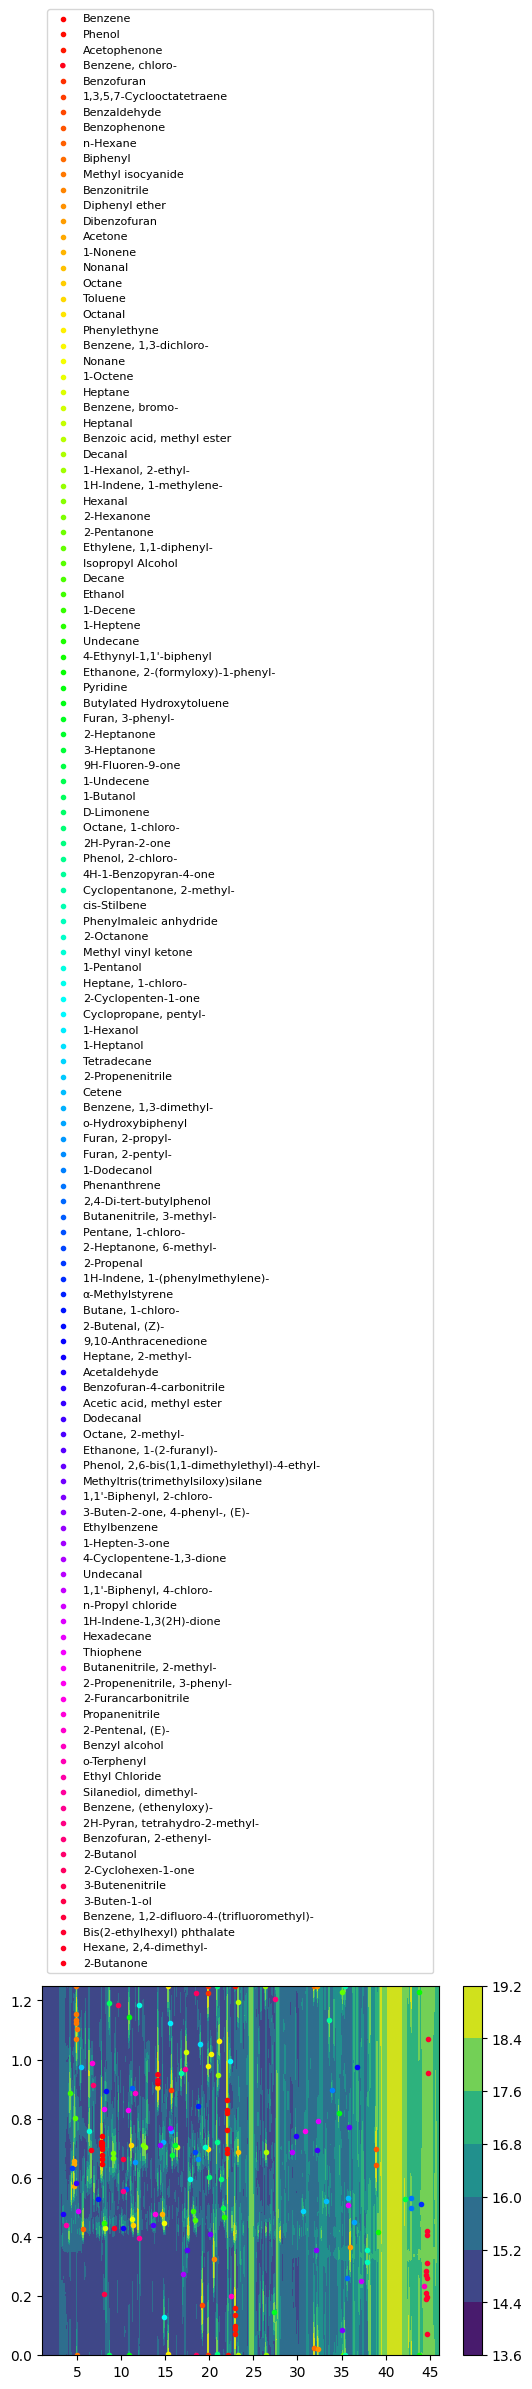

In [280]:
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=1.25, points=chromato_cd, casnos_dict=casnos_dict2, log_chromato=True)

[992  86]
982 76


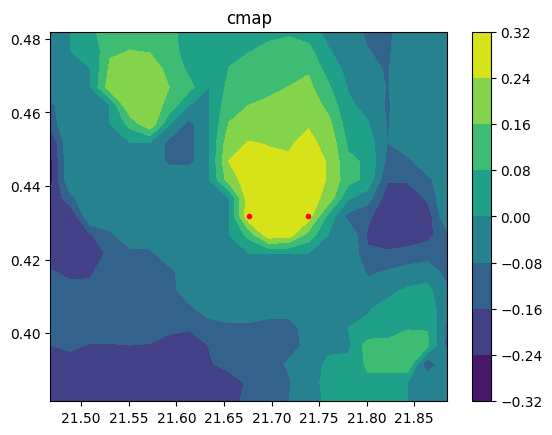

982 76


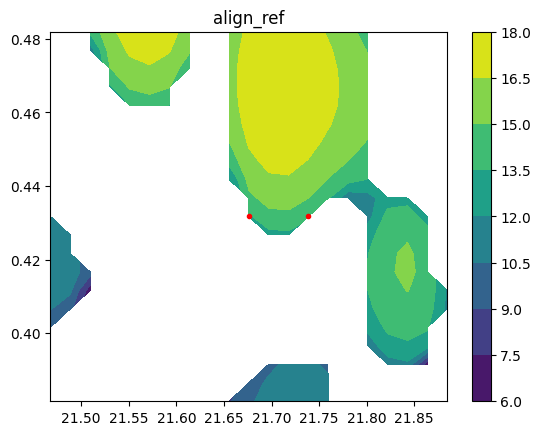

977 71


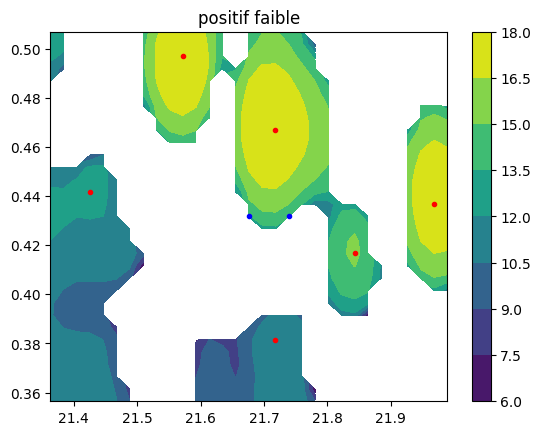

977 71


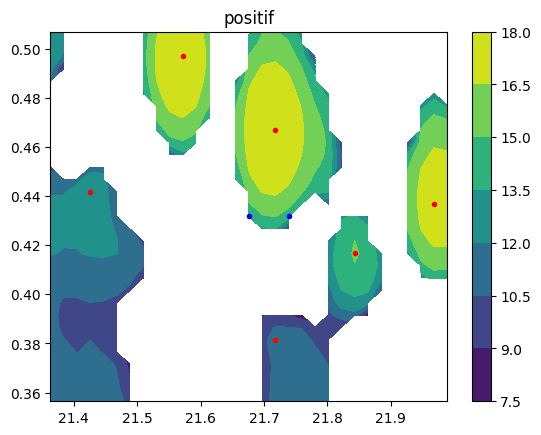

977 71


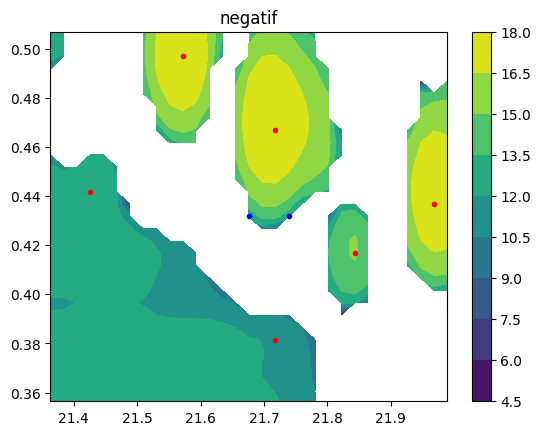

977 71


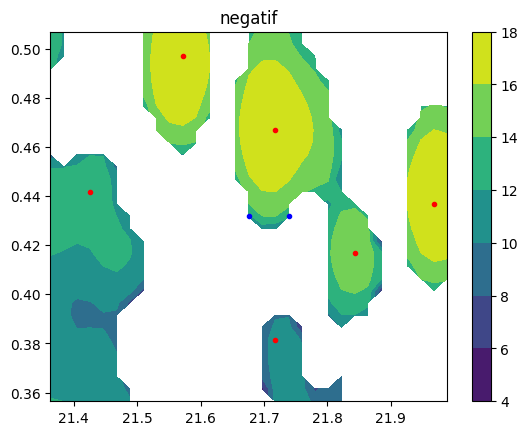

977 71


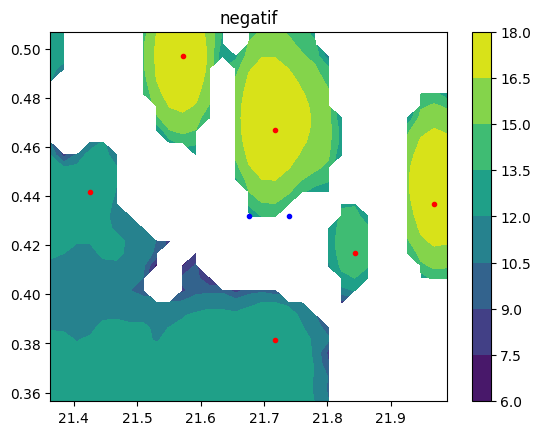

977 71


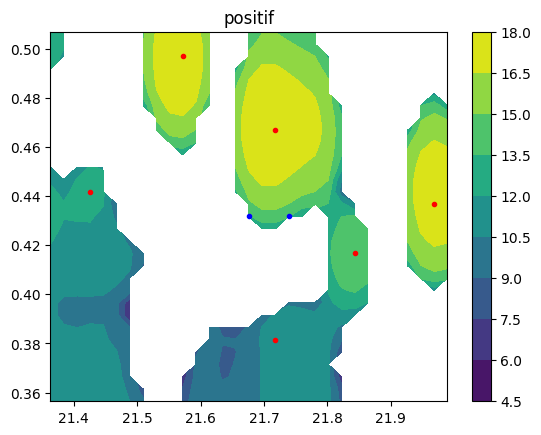

977 71


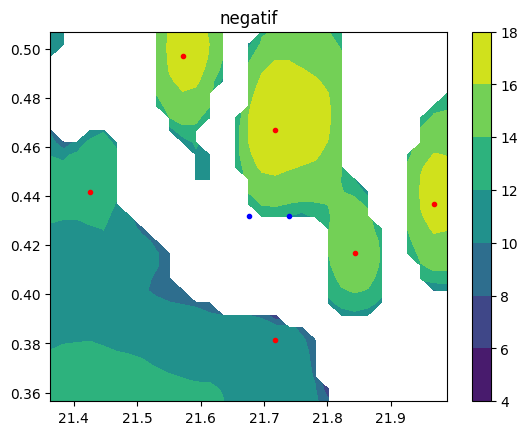

977 71


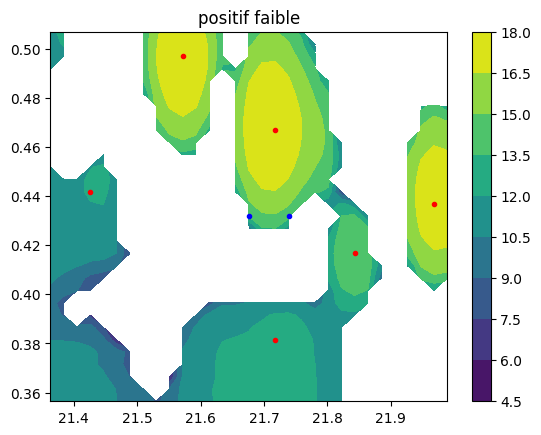

977 71


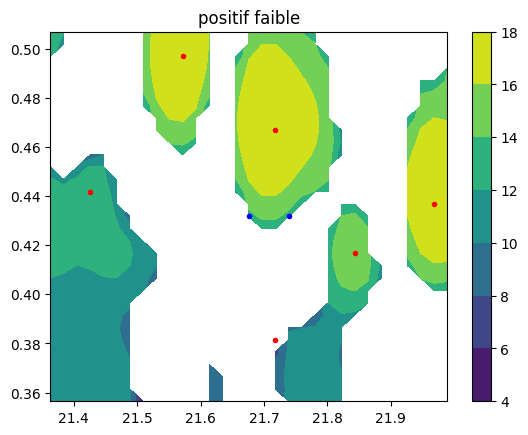

977 71


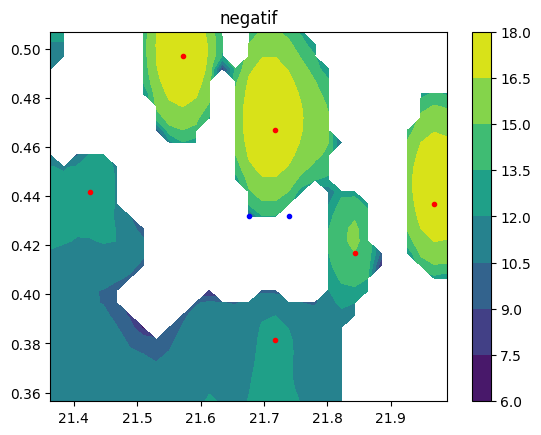

In [286]:
id=0
pt=pix[id]
points = np.array([local_discriminant_pixels_in_chromato[id]])
points=local_discriminant_pixels_in_chromato
print(pt)
plot.visualizer((cmap, chromato_ref_obj[1]), log_chromato=False, points=points, center_pt=pt, center_pt_window_1=10, center_pt_window_2=10, title="cmap")
plot.visualizer((aligned_chromatos[0], chromato_ref_obj[1]), log_chromato=True, points=points, center_pt=pt, center_pt_window_1=10, center_pt_window_2=10, title="align_ref")
for i, c in enumerate(aligned_chromatos):
    plot.visualizer(chromato_obj=(c, time_rn), mod_time=1.25, contour=points, points=chromato_cd, title=labels[i], center_pt=pt, center_pt_window_1=15, center_pt_window_2=15, log_chromato=True)


In [267]:
np.max(chromato_no_bl), 5 * sigma

(178359709.31555638, 28869.28681094751)

In [258]:
np.max(chromato_no_bl) * MIN_SEUIL

2886928.6810947508

In [248]:
MIN_SEUIL * np.max(chromato_no_bl)

2886928.6810947508

## Resume

In [21]:
for match in matches[:20]:
    print(match[1]["compound_name"])

Licochalcone C, 2TMS (isomer 2)
Licochalcone C, 2TMS (isomer 2)
2-Thiazoleacetonitrile, 4-tricyclo[3.3.1.1(3,7)]dec-1-yl-
1'H-Androst-2-eno[3,2-b]indol-17-one, 1'-(phenylmethyl)-, (5α)-
Cyclooctane, methyl-
Silane, diethyldi(pentafluorobenzyloxy)-
Licochalcone C, 2TMS (isomer 2)
α-d-Ribopyranoside, phenyl
2-Benzylidene-coumaran-3-one
2-Propenoic acid, octyl ester
1-[1-(2,2-Dichlorovinylimino)-2,2-dimethylpropyl]-3-(p-tolyl)thiourea
1H-Phenalen-1-one
Licochalcone C, 2TMS (isomer 2)
Silanediol, dimethyl-
Licochalcone C, 2TMS (isomer 2)
Benzeneethanamine, 2-fluoro-β,3-dihydroxy-N-methyl-
1,2,3,6,7,8,9,10,11,12-Decahydrobenzo[e]pyrene
3-Heptanone, 2-methyl-
2-Benzylidene-coumaran-3-one
1,5-Diazabicyclo[3.1.0]hexane


In [19]:
for match in matches_pos_plus_pos_f[:20]:
    print(match[1]["compound_name"])

## ACP

In [20]:
features = np.array([chroma.flatten() for chroma in aligned_chromatos])
features.shape

(10, 540000)

In [21]:
features_new_cd, pca = find_biom.acp(features, n_components=2)

[0.34988039 0.21997585] [4.24399391e+09 3.36513472e+09]


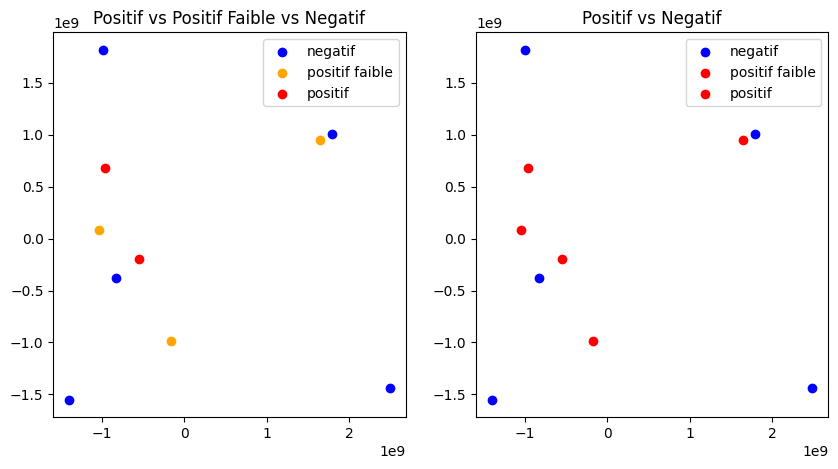

In [22]:
plot.plot_acp(features_new_cd, labels)

In [23]:
vij_posi_vs_other = np.ones(labels.shape)
vij_posi_vs_other[labels == 'negatif'] = -1
vij_posi_vs_other

array([ 1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1.])

In [24]:
discriminant_pixels = discriminant_pixel.find_discriminant_pixels(chromato_ref_obj, aligned_chromatos, vij_posi_vs_other, disp=False, max_pixel=500, local_max_filter=True)

In [25]:
features = np.array([chroma[discriminant_pixels[:, 0], discriminant_pixels[: , 1]] for chroma in aligned_chromatos])
features.shape
norm = False
if norm:
    features = normalize(features, norm='l1')

In [26]:
features_new_cd_disc_pix, pca_disc_pix = find_biom.acp(features, n_components=2)

[0.89045046 0.0472351 ] [25532805.2126575   5880660.05441102]


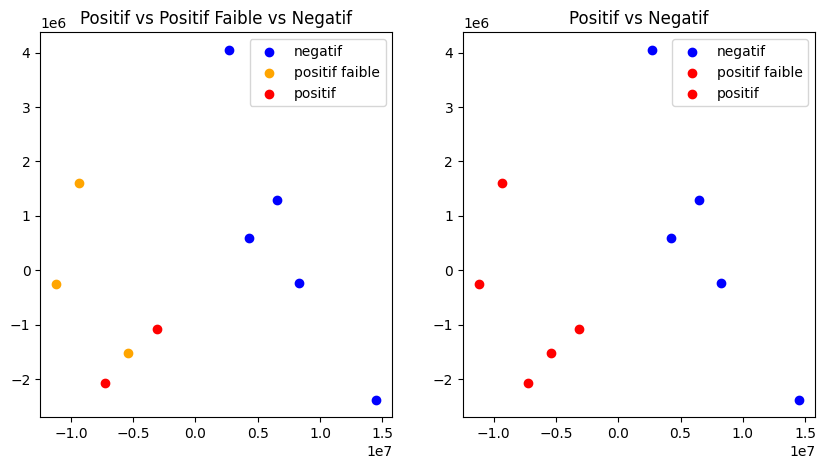

In [27]:
plot.plot_acp(features_new_cd_disc_pix, labels)

## Test Random labels

In [47]:
tmp_dict = {0:"positif", 1:"positif faible", 2:"negatif"}
import random
tmp_label_map = np.array([tmp_dict[random.randint(0,2)] for i in range(len(labels))])

In [48]:
tmp_label_map

array(['positif faible', 'negatif', 'negatif', 'positif faible',
       'positif faible', 'positif', 'negatif', 'negatif', 'positif',
       'positif faible'], dtype='<U14')

In [50]:
vij_random_posi_plus_posi_f = np.ones(labels.shape)
vij_random_posi_plus_posi_f[tmp_label_map == 'negatif'] = -1
vij_random_posi_plus_posi_f

array([ 1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.])

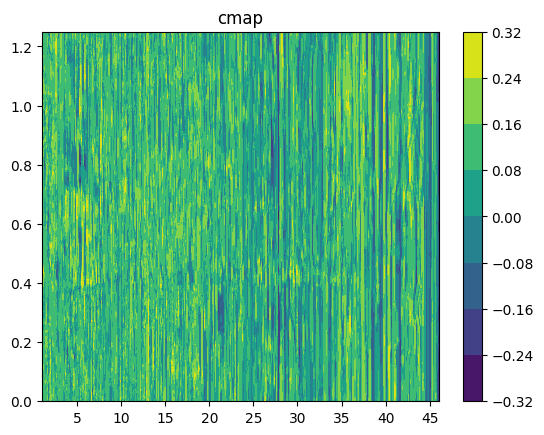

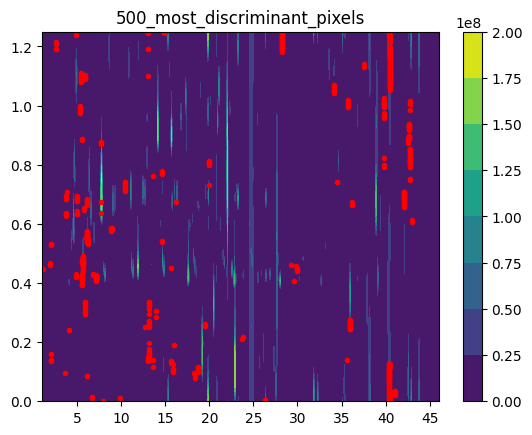

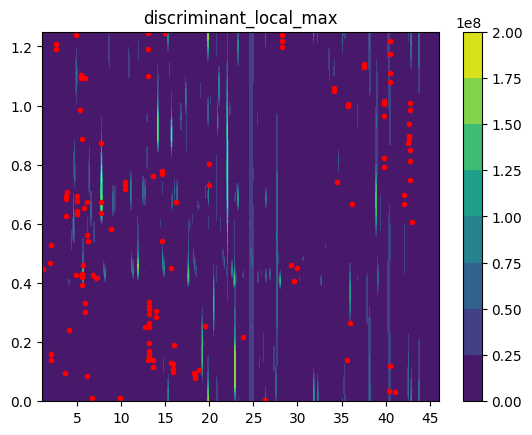

In [51]:
discriminant_pixels_random_posi_plus_posi_f = discriminant_pixel.find_discriminant_pixels(chromato_ref_obj, aligned_chromatos, vij_random_posi_plus_posi_f, disp=True, max_pixel=500, local_max_filter=True)

[0.79059304 0.06247296] [54981440.74937449 15455592.95761115]


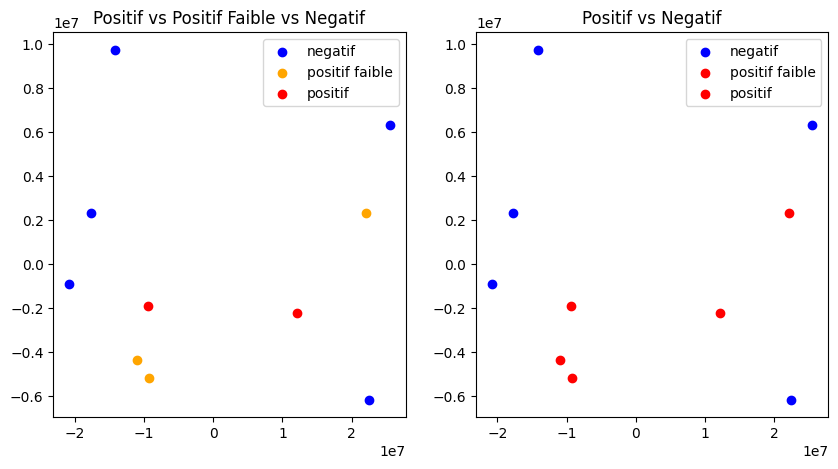

In [52]:
features = np.array([chroma[discriminant_pixels_random_posi_plus_posi_f[:, 0], discriminant_pixels_random_posi_plus_posi_f[: , 1]] for chroma in aligned_chromatos])
features.shape
features_new_cd_disc_pix_random, pca_disc_pix_random = find_biom.acp(features, n_components=2)
plot.plot_acp(features_new_cd_disc_pix_random, labels)

# Disc. pixels mpm

In [6]:
chromato_ref_obj = read_chroma.read_chroma(FOLD_PATH + files[2], mod_time)
chromato, time_rn, spectra_obj = chromato_ref_obj

In [7]:
chromato, time_rn, spectra_obj = chromato_ref_obj
full_spectra = mass_spec.read_full_spectra_centroid(spectra_obj=spectra_obj)
spectra, debuts, fins = full_spectra

--- 329.14682602882385 seconds --- to compute full spectra centroid


In [8]:
chromato_cube = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra, spectra_obj=spectra_obj)
chromato_cube = np.array(baseline_correction.chromato_cube_corrected_baseline(chromato_cube))

In [9]:
chromato_no_bl = baseline_correction.chromato_no_baseline(chromato)

5.5Go to 12.5Go=+7Go

In [10]:
importlib.reload(read_chroma)

<module 'read_chroma' from 'c:\\Users\\Stan\\pic\\read_chroma.py'>

In [6]:
chromato, time_rn, chromato_cube, sigma=read_chroma.read_chromato_and_chromato_cube(FOLD_PATH + files[2])

chromato readed 17.37299346923828 s
--- 330.97293043136597 seconds --- to compute full spectra centroid
full spectra computed 334.15611267089844 s
baseline corrected


5.35Go to 7.5Go=+2.15Go Pas mal de faire comme ça on économise ~5Go